# Методы оптимизации

1) Написать класс **StochasticGradientDesent**, который ищет минимальное значение функции при помощи одномерного **стохастического градиентного спуска**. 

- Функция, для которой нужно найти минимум 5*sin(2*x) + x**2
- За значения параметров по умолчанию взять learning_rate=0.01, eps=0.001, n_iter=100
- За **начальное приближение вектора** взять **случайное число из X**
- За случайные объекты при вычислении миниумма брать **случайное число из X**
- В качестве названия метода в классе для поиска минимума используйте название **fit()** как в лекции
- **Примерный шаблон** для своего класса вы можете взять **из лекции**

<div class="alert alert-block alert-danger"> ОБЯЗАТЕЛЬНО ИСПОЛЬЗОВАТЬ DOCSTRING, TYPY HINTS и PEP8, иначе работа засчитана не будет!!!</div> 

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.optimize import minimize

In [132]:
# Найти минимум функции 5*sin(2*x) + x**2

# class
class StochasticGradientDesent:
    """
    Алгоритм стохастического градиентного спуска
    """

    def __init__(self, learning_rate: float = 0.01,
                 eps: float = 0.001, n_iter: int = 100):
        """
        Parameters
        ----------
        n_iter - кол-во итераций
        learning_rate - скорость градиентного спуска
        eps - условие остановки
        """
        self.n_iter = n_iter
        self.eps = eps
        self.learning_rate = learning_rate

    @staticmethod
    def get_func(x: float) -> float:
        """
        Функция 5*sin(2*x) + x**2
        Parameters
        ----------
        x - значения по оси OX

        Returns
        -------
        значения по оси OY
        """
        return 5*np.sin(2*x) + x**2

    @staticmethod
    def get_der_func(x: float) -> float:
        """
        Производная функции 5*sin(2*x) + x**2
        Parameters
        ----------
        x - значения по оси OX

        Returns
        -------
        Значение производной на основании X
        """
        return 10*np.cos(2*x) + 2*x

    def fit(self, X) -> dict:
        """
        Поиск оптимальных параметров

        Parameters
        ----------
        X - значения по оси OX
        y - значения по оси OY

        Returns
        -------
        Словарь с результатами оптимизации
        """
        solutions_x, solutions_y = list(), list()
        iters, error = list(), list()

        x_pred = 0

        for i in range(self.n_iter):
            solutions_x.append(x_pred)
            solutions_y.append(self.get_func(x_pred))

            x_random = np.random.choice(X)

            gradient = self.get_der_func(x_random)
            learning_rate = self.learning_rate

            x_new = x_pred - learning_rate * gradient

            error.append(abs(x_new - x_pred))
            iters.append(i)

            if abs(x_new - x_pred) < self.eps:
                break

            x_pred = x_new.copy()

        return {
            "solutions_x": solutions_x,
            "solutions_y": solutions_y,
            "error": error,
            "iters": iters,
            "min_x": solutions_x[-1],
            "min_y": solutions_y[-1]
        }

2) Обучение оптимизатора и поиск минимума функции

- **За минимальное значение X на графике взять -5, за максимальное 6.1**, то есть область определения [-5,6.1]
- Создайте экземпляр класса **StochasticGradientDesent**, который описали выше (стохастический градиентный спуск).
- Подайте на вход **следующие значения**:
    - Кол-во итераций = 100 (n_iter)
    - Скорость обьучения = 0.001 (learning_rate)
    - Ошибка 0.001 (eps)
- Вызовите метод **fit()** из экзепляра класса для поиска минимума, записав результат в переменную **result** в виде словаря, ПРИМЕР смотрите в ЛЕКЦИИ
- Не забывайте про то, чтобы также вычислить значения для оси OY (пример в лекции) для дальнейшей отрисовки графика

In [140]:
# Мин и макс значения по оси OX
x_min, x_max = -5.0, 6.1

# Значения по OX
X = np.arange(x_min, x_max, 0.1)


clf = StochasticGradientDesent(learning_rate=0.001, eps=0.001, n_iter=100)
result = clf.fit(X)

# Значения по оси OY на основании X
y = clf.get_func(X)

result["iters"][-1]

41

3) Отобразите **ДВА рисунка в одной строке, но в разных столбцах**, где:
- Первый рисунок - это **график исходной функции** с изображением поэтапного поиска **минимума** (используйте также данные из переменной result), где конечное значение - минимум будет отображен при помощи зеленой точки (смотреть пример в лекции)
- Второй рисунок - **График зависимости** количества итераций от ошибки
- Не пугайтесь, что ваш алгоритм может находить далеко не самое минимальное значение

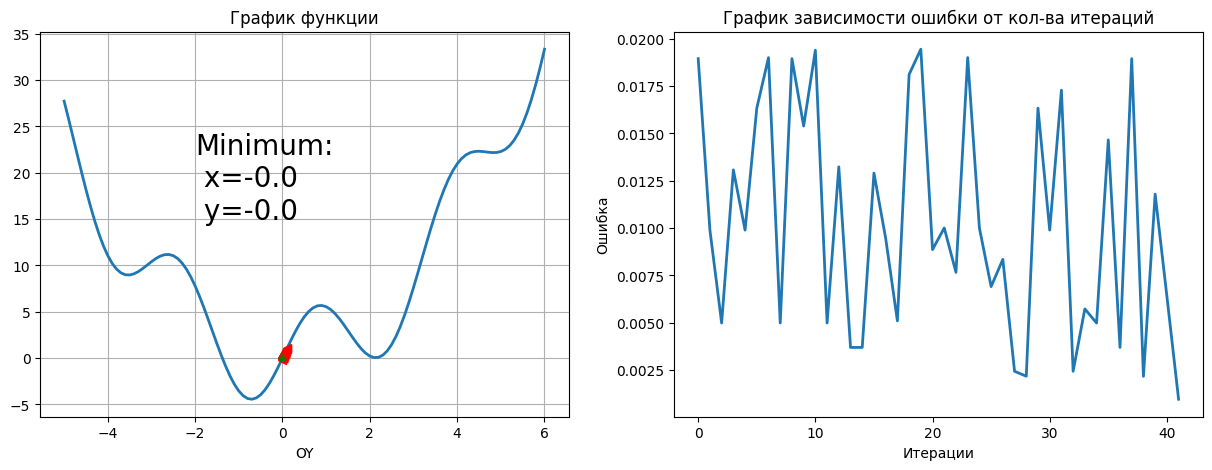

In [141]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].set_title('График функции')
axes[0].plot(X, y, linewidth=2)
axes[0].plot(result['solutions_x'], result['solutions_y'], '<-', color='red')
axes[0].plot(result['min_x'], result['min_y'], '*', color='green')
axes[0].text(
    -2,
    15,
    f'Minimum:\n x={round(result["min_x"], 2)}\n y={round(result["min_y"], 2)}',
    fontsize=20,
    color='black')
axes[0].set_xlabel('OX')
axes[0].set_xlabel('OY')
axes[0].grid()

axes[1].set_title('График зависимости ошибки от кол-ва итераций')
axes[1].plot(result['iters'], result['error'], linewidth=2)
axes[1].set_xlabel('Итерации')
axes[1].set_ylabel('Ошибка')
plt.show()

4) **Выведите минимальные значения x и y** (координаты по OX и OY), полученные при помощи данного метода оптимизации при помощи print(), **округлите** значения до двух знаков после запятой


Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум?

In [118]:
print(round(result["min_x"], 2), round(result["min_y"], 2))
#результаты далеки от глобального и локальных минимумов

-0.33 -2.96


5) Сравните со значениями, получеными при помощи встроенного метода оптимизации **'Nelder-Mead'**  в scipy. 
- Выведите полный результат работы метода (пример в лекции)
- Выведите отдельно минимальные значения x и y, а также кол-во итераций
- Округлите значения минимума (координаты по OX и OY) до двух знаков после запятой

Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум?

In [147]:
first = time.time()
res = minimize(clf.get_func, x0=0, method='Nelder-Mead')
second = time.time()

time_NM = second - first
print(res)
# алгоритм нашел глобальный минимум

 final_simplex: (array([[-0.71375  ],
       [-0.7138125]]), array([-4.43931413, -4.43931412]))
           fun: -4.439314125564341
       message: 'Optimization terminated successfully.'
          nfev: 48
           nit: 24
        status: 0
       success: True
             x: array([-0.71375])


In [129]:
print(res["x"][0])
print(res["fun"])
print(res["nit"])

-0.7137500000000006
-4.439314125564341
24


6) Сравните со значением, полученым при помощи встроенного метода оптимизации **'BFGS'** (алгоритм Бройдена — Флетчера — Гольдфарба — Шанно) в scipy. 
- Выведите полный результат работы метода (пример в лекции)
- Выведите отдельно минимальные значения x и y, а также кол-во итераций
- Округлите значения минимума (координаты по OX и OY) до двух знаков после запятой

Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум? 

In [148]:
first = time.time()
res = minimize(clf.get_func, x0=0, method='BFGS')
second = time.time()

time_BFGS = second - first
print(res)
# алгоритм нашел глобальный минимум

      fun: -4.439314132868537
 hess_inv: array([[0.04588373]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-0.7137759])


In [149]:
print(res["x"][0])
print(res["fun"])
print(res["nit"])

-0.7137758975947067
-4.439314132868537
5


7) Какой из алгоритмов оказался наилучшим?

In [150]:
print(time_NM)
print(time_BFGS)
# Оба алгоритма нашли минимум функции, но BFGS для этой функции нашел его быстрее

0.01035928726196289
0.009329557418823242
